# Multiclass Perceptron
In the previous discussion we've gone over a perceptron with only 2 classes. In this notebook we'll show how it can work on multiple classes, following the slides from the lecture.

In [1]:
# Import all required libraries
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

np.random.seed(0)
%matplotlib inline

# Data Sampling

In [2]:
x_0 = np.random.normal(loc=[-4, 2], scale=0.5, size=(100, 2))
x_1 = np.random.normal(loc=[-4, -3], scale=0.5, size=(100, 2))
x_2 = np.random.normal(loc=[4, 1], scale=0.5, size=(100, 2))
x_3 = np.random.normal(loc=[5, -2], scale=0.5, size=(100, 2))

X = np.vstack([x_0, x_1, x_2, x_3])
Y = np.ones(X.shape[0], dtype=np.intc)
Y[:100] = 0
Y[100:200] = 1
Y[200:300] = 2
Y[300:] = 3

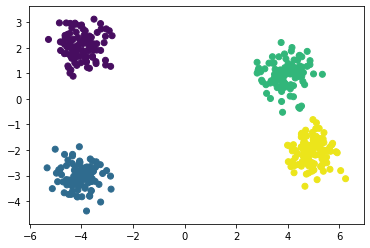

In [3]:
ml.plotClassify2D(None, X, Y)

In [5]:
classes = np.unique(Y)
print(classes)

[0 1 2 3]


## Multiclass Preceptron Training Algorithm

<img src = 'extras/multiclass.png'>

One of the main differences is that now there is a $\theta_c$ for each class. So in the algorithm above $\theta$ is basically size $\#Classes \times \#Features$. 

To find the class, instead of using the sign threshold on the response, we are looking for the class that maximizes the response.

So let's adapt the code from the previous discussion to do this.

Let's add the const to the X and create the theta matrix.

In [6]:
# Like previous discussion
def add_const(X):
    return np.hstack([np.ones([X.shape[0], 1]), X])

In [7]:
Xconst = add_const(X)
theta = np.random.randn(classes.shape[0], Xconst.shape[1]) # Adding 1 for theta corresponding to bias term

x_j, y_j = Xconst[5], Y[5]

In [8]:
# The response is also the same, only we transpose the theta.
def resp(x, theta):
    return np.dot(x, theta.T)

For the predict we need to find the class that maximizes the response. We can do this with np.argmax().

In [9]:
def predict(x, theta):
    r = resp(x, theta)
    return np.argmax(np.atleast_2d(r), axis=1)

# Error stays the same
def pred_err(X, Y, theta):
    """Predicts that class for X and returns the error rate. """
    Yhat = predict(X, theta)
    return np.mean(Yhat != Y)

In [11]:
pred_vals = predict(x_j, theta)
print('Predicted class %d, True class is %d' % (pred_vals, y_j))

Predicted class 3, True class is 0


## Learning Update

In [12]:
a = 0.1
y_j_hat = predict(x_j, theta)

theta[y_j_hat] -= a * x_j
theta[y_j] += a * x_j

## Train method
Using everything we coded so far, let's code the training method.

In [14]:
def train(X, Y, a=0.01, stop_tol=1e-8, max_iter=50):
    Xconst = add_const(X)
    m, n = Xconst.shape
    c = np.unique(Y).shape[0]
    
    # Initializing theta
    theta = np.random.rand(c, n)
    
    # The update loop
    J_err = [np.inf]
    for i in range(1, max_iter + 1):
        for j in range(m):
            x_j, y_j = Xconst[j], Y[j]
            y_j_hat = predict(x_j, theta)
            theta[y_j_hat] -= a * x_j
            theta[y_j] += a * x_j
        
        curr_err = pred_err(Xconst, Y, theta)
        J_err.append(curr_err)
        
        print('Error %.3f at iteration %d' % (J_err[-1], i))
    
    return theta, J_err

## Multiclass Pereptron Object
Let us put this all in a class MultiPerceptron. 

In [17]:
from mltools.base import classifier
class MultiClassPerceptron(classifier):
    def __init__(self, theta=None):
        self.theta = theta
        
    def add_const(self, X):
        return np.hstack([np.ones([X.shape[0], 1]), X])

    def resp(self, x):
        return np.dot(x, self.theta.T)    
    
    def predict(self, X):
        """Retruns class prediction for either single point or multiple points. """
        Xconst = np.atleast_2d(X)
        
        # Making sure it has the const, if not adding it.
        if Xconst.shape[1] == self.theta.shape[1] - 1:
            Xconst = self.add_const(Xconst)
        
        r = self.resp(Xconst)
        return np.argmax(np.atleast_2d(r), axis=1)
  
    # Notice that we don't need the sign function (from Perceptron class) any longer
#     def sign(self, vals):
#         """A sign version with breaking 0's as +1. """
#         return np.sign(vals + 1e-200)
    
    def pred_err(self, X, Y):
        Yhat = self.predict(X)
        return np.mean(Yhat != Y)

    def train(self, X, Y, a=0.01, stop_tol=1e-8, max_iter=50):
        # Start by adding a const
        Xconst = self.add_const(X)

        m, n = Xconst.shape
        c = np.unique(Y).shape[0]
        self.classes = np.unique(Y)
        
        # Making sure Theta is inititialized.
        if self.theta is None:
            self.theta = np.random.randn(c, n)

        # The update loop
        J_err = [np.inf]
        for i in range(1, max_iter + 1):
            for j in np.random.permutation(m):
                x_j, y_j = Xconst[j], Y[j]
                y_j_hat = self.predict(x_j)

                self.theta[y_j_hat[0]] -= a * x_j
                self.theta[y_j] += a * x_j
                
            curr_err = self.pred_err(Xconst, Y)
            J_err.append(curr_err)

        return J_err    

Let's train and plot :)

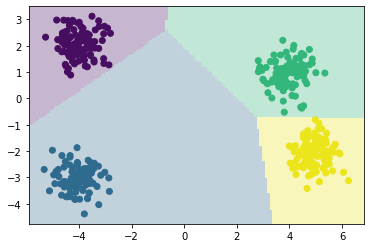

In [18]:
model = MultiClassPerceptron()
j_err = model.train(X, Y, a=.02, max_iter=50)
ml.plotClassify2D(model, X, Y)

## Bonus question
In the plot below we have two classes. Let's assume that I want to have multiclass perceptron with 2 classes, what would theta have to be to separate them correctly?

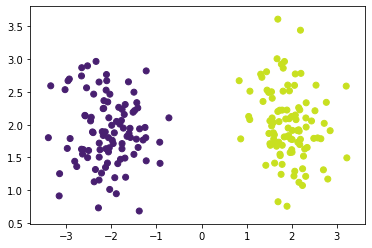

In [19]:
x_0 = np.random.normal(loc=[-2, 2], scale=0.5, size=(100, 2))
x_1 = np.random.normal(loc=[2, 2], scale=0.5, size=(100, 2))

X = np.vstack([x_0, x_1])
Y = np.ones(X.shape[0], dtype=np.intc)
Y[:100] = 0
Y[100:200] = 1

ml.plotClassify2D(None, X, Y)

In [ ]:
theta = ????   # Fill in the code and run
model = MultiClassPerceptron(theta)
ml.plotClassify2D(model, X, Y)